SOCIO ECONOMIC HEALTH DISPARITY

In [278]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [279]:
# import pandas as pd
# from sklearn.preprocessing import StandardScaler

# # Load NHANES datasets
# files = {
#     "DEMO_L": "DEMO_L.XPT",     # Demographics
#     "DIQ_L": "DIQ_L.XPT",       # Diabetes
#     "HEPA_L": "HEPA_L.XPT",     # Hepatitis A
#     "HEQ_L": "HEQ_L.XPT",       # Hepatitis B
#     "HOQ_L": "HOQ_L.XPT",       # Housing
#     "HSQ_L": "HSQ_L.XPT",       # HIV
#     # "INQ_L": "INQ_L.XPT",       # Total Savings
#     "KIQ_U_L": "KIQ_U_L.XPT",   # Weak Failing Kidneys
#     "MCQ_L": "MCQ_L.XPT",       # Disease, ..., etc.
#     "OCQ_L": "OCQ_L.XPT",       # Occupational
#     "RXQ_RX_L": "RXQ_RX_L.XPT", # Taken Prescription Medicine
# }

# dataframes = {name: pd.read_sas(f"{filename}", format="xport") for name, filename in files.items()}

# # Merge datasets on 'SEQN'
# df = dataframes["DEMO_L"]
# for name, df_other in dataframes.items():
#     if name != "DEMO_L":
#         df = df.merge(df_other, on="SEQN", how="inner")

# # Select relevant columns
# selected_columns = [
#     "SEQN", "RIDAGEYR", "RIAGENDR", "DMDEDUC2", "INDFMPIR",  # Demographics (DEMO_L)
#     # "IND310", # Total savings (INQ_L)
#     "OCD150",  # Occupational (OCQ_L)
#     "HOD051", # Housing (HOQ_L)
#     "DIQ010", # Diabetes (DIQ_L)
#     "MCQ010", "MCQ160B", "MCQ160C", "MCQ160E", "MCQ160M", "MCQ160P", "MCQ160L", "MCQ550", "MCQ220", # Disease (MCQ_L) 
#     "HSQ590", # HIV (HSQ_L)
#     "LBXHA", # Hepatitis A (HEPA_L)
#     "HEQ010", # Hepatitis B (HEQ_L)
#     "KIQ022", # Kidney (KIQ_U_L)
#     "RXQ033" # Prescription (RXQ_RX_L)
# ]
# df = df[[col for col in selected_columns if col in df.columns]]

# # Convert non-numeric columns to NaN before computing median
# for col in df.columns:
#     df[col] = pd.to_numeric(df[col], errors='coerce')

# # Handle missing values: Fill NaNs with column medians
# df.fillna(df.median(), inplace=True)

# # # Normalize numerical features for clustering
# # numeric_features = ["BMXBMI", "BMXWAIST", "BPXSY1", "BPXDI1", "LBXGLU", "LBXINS", "LBXHSCRP", "LBXTC"]
# # numeric_features = [col for col in numeric_features if col in df.columns]
# # scaler = StandardScaler()
# # df[numeric_features] = scaler.fit_transform(df[numeric_features])

# # Save final dataset
# df.to_csv("NHANES_SES_RawData.csv", index=False)
# print("Final dataset saved as 'NHANES_SES_RawData.csv'")


In [280]:
file = "NHANES_SES_RawData.csv"
df = pd.read_csv(file)
df.head()

,SEQN,RIDAGEYR,RIAGENDR,DMDEDUC2,INDFMPIR,OCD150,HOD051,DIQ010,MCQ010,MCQ160B,...,MCQ160M,MCQ160P,MCQ160L,MCQ550,MCQ220,HSQ590,LBXHA,HEQ010,KIQ022,RXQ033
0,130378.0,43.0,1.0,5.0,5.00,1.0,10.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0
1,130379.0,66.0,1.0,5.0,5.00,1.0,9.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0
2,130380.0,44.0,2.0,3.0,1.41,1.0,6.0,1.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0
3,130386.0,34.0,1.0,4.0,1.33,1.0,3.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0
4,130387.0,68.0,2.0,5.0,1.32,4.0,7.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0


In [281]:
df.columns

Index(['SEQN', 'RIDAGEYR', 'RIAGENDR', 'DMDEDUC2', 'INDFMPIR', 'OCD150',
       'HOD051', 'DIQ010', 'MCQ010', 'MCQ160B', 'MCQ160C', 'MCQ160E',
       'MCQ160M', 'MCQ160P', 'MCQ160L', 'MCQ550', 'MCQ220', 'HSQ590', 'LBXHA',
       'HEQ010', 'KIQ022', 'RXQ033'],
      dtype='object')

In [282]:
# rename columns
df.columns = ['SEQN',
    'Age', 'Gender', 'Education', 'FamilyIncomeRatio', # Demographics
    'Occupation', # Occupational
    'Housing', # Housing
    'Diabetes', # Diabetes
    'Asthma', 'CongestiveHeartFailure', 'CoronaryHeartDisease', 'HeartAttack', 
    'ThyroidProblem', 'Emphysema', 'LiverCondition', 'Gallstone', 'CancerOrMalignancy', # Disease
    'HIV', # HIV
    'HepatitisA', # Hepatitis A
    'HepatitisB', # Hepatitis B
    'WeakFailingKidney', # Kidney
    'TakenPrescriptionMedicine' # Prescription
]

df.head()

,SEQN,Age,Gender,Education,FamilyIncomeRatio,Occupation,Housing,Diabetes,Asthma,CongestiveHeartFailure,...,ThyroidProblem,Emphysema,LiverCondition,Gallstone,CancerOrMalignancy,HIV,HepatitisA,HepatitisB,WeakFailingKidney,TakenPrescriptionMedicine
0,130378.0,43.0,1.0,5.0,5.00,1.0,10.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0
1,130379.0,66.0,1.0,5.0,5.00,1.0,9.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0
2,130380.0,44.0,2.0,3.0,1.41,1.0,6.0,1.0,2.0,2.0,...,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,1.0
3,130386.0,34.0,1.0,4.0,1.33,1.0,3.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0
4,130387.0,68.0,2.0,5.0,1.32,4.0,7.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0


In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6064 entries, 0 to 6063
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   SEQN                       6064 non-null   float64
 1   Age                        6064 non-null   float64
 2   Gender                     6064 non-null   float64
 3   Education                  6064 non-null   float64
 4   FamilyIncomeRatio          6064 non-null   float64
 5   Occupation                 6064 non-null   float64
 6   Housing                    6064 non-null   float64
 7   Diabetes                   6064 non-null   float64
 8   Asthma                     6064 non-null   float64
 9   CongestiveHeartFailure     6064 non-null   float64
 10  CoronaryHeartDisease       6064 non-null   float64
 11  HeartAttack                6064 non-null   float64
 12  ThyroidProblem             6064 non-null   float64
 13  Emphysema                  6064 non-null   float

In [284]:
df.describe()

,SEQN,Age,Gender,Education,FamilyIncomeRatio,Occupation,Housing,Diabetes,Asthma,CongestiveHeartFailure,...,ThyroidProblem,Emphysema,LiverCondition,Gallstone,CancerOrMalignancy,HIV,HepatitisA,HepatitisB,WeakFailingKidney,TakenPrescriptionMedicine
count,6064.000000,6064.000000,6064.000000,6064.000000,6.064000e+03,6064.000000,6064.000000,6064.000000,6064.000000,6064.000000,...,6064.000000,6064.000000,6064.000000,6064.000000,6064.000000,6064.000000,6064.000000,6064.000000,6064.000000,6064.000000
mean,136346.300132,53.850099,1.551451,3.839380,2.906971e+00,2.370218,5.695086,1.893305,1.824703,1.967843,...,1.875495,1.937500,1.952342,1.905508,1.856530,1.743734,1.618734,2.017645,1.974604,1.307058
std,3437.864592,17.183330,0.497387,1.144338,1.543564e+00,1.448999,4.572527,0.410156,0.457434,0.338017,...,0.464295,0.388545,0.365335,0.453487,0.417176,0.510125,0.497149,0.486179,0.355464,0.523292
min,130378.000000,20.000000,1.000000,1.000000,5.397605e-79,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,133335.500000,39.000000,1.000000,3.000000,1.620000e+00,1.000000,4.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000
50%,136391.000000,57.000000,2.000000,4.000000,2.820000e+00,1.000000,5.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
75%,139304.250000,68.000000,2.000000,5.000000,4.560000e+00,4.000000,7.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,142310.000000,80.000000,2.000000,9.000000,5.000000e+00,9.000000,99.000000,3.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,3.000000,9.000000,9.000000,9.000000


In [285]:
features = df.columns.drop('SEQN')

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[features] = scaler.fit_transform(df[features])

In [286]:
df_scaled.describe()

,SEQN,Age,Gender,Education,FamilyIncomeRatio,Occupation,Housing,Diabetes,Asthma,CongestiveHeartFailure,...,ThyroidProblem,Emphysema,LiverCondition,Gallstone,CancerOrMalignancy,HIV,HepatitisA,HepatitisB,WeakFailingKidney,TakenPrescriptionMedicine
count,6064.000000,6.064000e+03,6.064000e+03,6.064000e+03,6.064000e+03,6.064000e+03,6.064000e+03,6.064000e+03,6.064000e+03,6.064000e+03,...,6.064000e+03,6.064000e+03,6.064000e+03,6.064000e+03,6.064000e+03,6.064000e+03,6.064000e+03,6.064000e+03,6.064000e+03,6.064000e+03
mean,136346.300132,-1.757609e-16,2.366913e-16,1.265478e-16,-1.511544e-16,1.124870e-16,-9.608263e-17,-7.967828e-17,1.464674e-16,-1.154163e-16,...,6.737501e-17,-9.959784e-18,-2.296609e-16,1.101435e-16,-2.437218e-16,1.406087e-17,-3.046522e-17,1.687305e-16,1.640435e-17,-9.344621e-17
std,3437.864592,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,...,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00,1.000082e+00
min,130378.000000,-1.970101e+00,-1.108788e+00,-2.481447e+00,-1.883440e+00,-9.457086e-01,-1.026888e+00,-2.178141e+00,-1.803037e+00,-2.863536e+00,...,-1.885800e+00,-2.413049e+00,-2.606977e+00,-1.996934e+00,-2.053330e+00,-1.458063e+00,-1.244667e+00,-2.093321e+00,-2.742005e+00,-5.868300e-01
25%,133335.500000,-8.642867e-01,-1.108788e+00,-7.335675e-01,-8.338345e-01,-9.457086e-01,-3.707415e-01,2.601545e-01,3.832491e-01,9.514220e-02,...,2.681821e-01,1.608699e-01,1.304617e-01,2.083852e-01,3.439348e-01,-1.458063e+00,-1.244667e+00,-3.629645e-02,7.144988e-02,-5.868300e-01
50%,136391.000000,1.833266e-01,9.018853e-01,1.403722e-01,-5.634870e-02,-9.457086e-01,-1.520260e-01,2.601545e-01,3.832491e-01,9.514220e-02,...,2.681821e-01,1.608699e-01,1.304617e-01,2.083852e-01,3.439348e-01,5.024012e-01,7.669696e-01,-3.629645e-02,7.144988e-02,-5.868300e-01
75%,139304.250000,8.235347e-01,9.018853e-01,1.014312e+00,1.071006e+00,1.124857e+00,2.854050e-01,2.601545e-01,3.832491e-01,9.514220e-02,...,2.681821e-01,1.608699e-01,1.304617e-01,2.083852e-01,3.439348e-01,5.024012e-01,7.669696e-01,-3.629645e-02,7.144988e-02,1.324307e+00
max,142310.000000,1.521944e+00,9.018853e-01,4.510071e+00,1.356084e+00,4.575800e+00,2.040723e+01,2.698450e+00,1.568725e+01,2.080589e+01,...,1.534606e+01,1.817830e+01,1.929254e+01,1.564562e+01,1.712479e+01,1.422565e+01,2.778606e+00,1.436288e+01,1.976563e+01,1.470227e+01


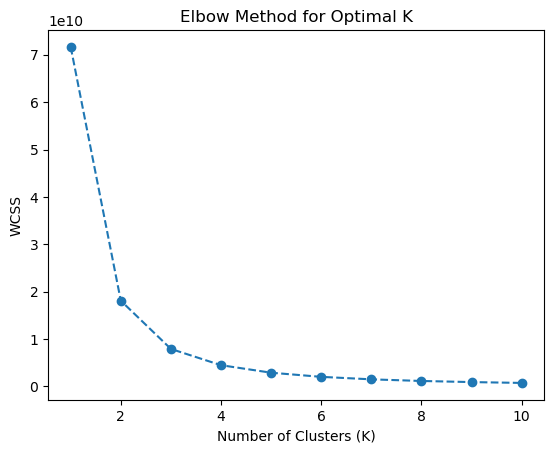

In [287]:
# try elbow method
 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []  # Store WCSS values

for k in range(1, 11):  # Test K from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)  # Use the standardized data
    wcss.append(kmeans.inertia_)  # Inertia = WCSS

# Plot the Elbow Graph
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()


In [288]:
kmeans = KMeans(n_clusters=3, random_state=42)
df_scaled['cluster'] = kmeans.fit_predict(df_scaled[features])

In [289]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df_scaled.drop(columns=['cluster']))
df_scaled['PCA1'] = pca_result[:, 0]
df_scaled['PCA2'] = pca_result[:, 1]
df_scaled['PCA3'] = pca_result[:, 2]

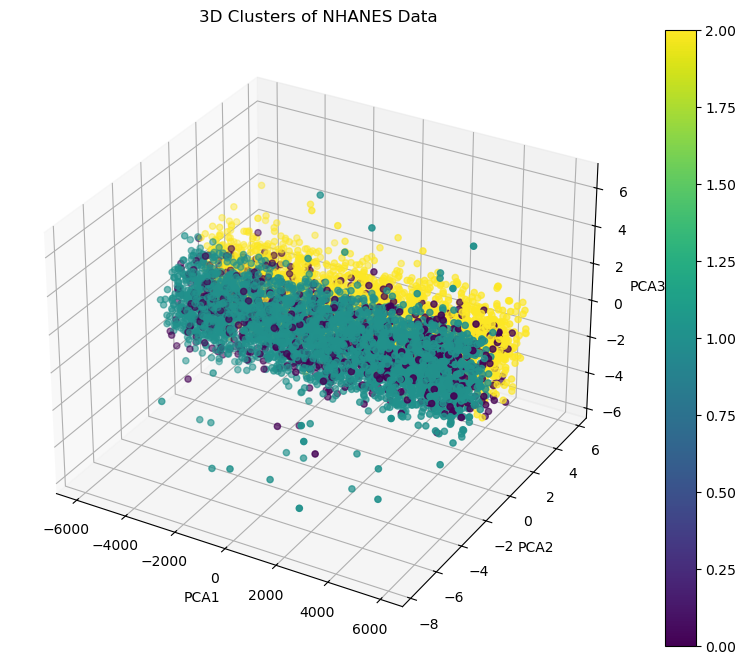

In [290]:
# Visualize Clusters in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df_scaled['PCA1'], df_scaled['PCA2'], df_scaled['PCA3'], c=df_scaled['cluster'], cmap='viridis')
ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
ax.set_zlabel("PCA3")
plt.title("3D Clusters of NHANES Data")
plt.colorbar(sc)
plt.show()

# # Visualize Clusters in 2D
# plt.figure(figsize=(10, 8))
# plt.scatter(df_scaled['PCA1'], df_scaled['PCA2'], c=df_scaled['cluster'], cmap='viridis')
# plt.xlabel("PCA1")
# plt.ylabel("PCA2")
# plt.title("2D Clusters of NHANES Data")
# plt.colorbar()
# plt.show()

In [291]:
# get the silhouette score
from sklearn.metrics import silhouette_score

silhouette_score(df_scaled[features], df_scaled['cluster'])


0.10202320162514317